#### Step_1 : Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

from pycaret.classification import *

In [2]:
df1=pd.read_csv('NID_revised_cleanData.csv')
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT,CT_Status,CT_Indicator,CT_Indicator_3
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,226,With-in SLA,Green,Green
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,91,With-in SLA,Green,Green
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,117,With-in SLA,Green,Green


In [3]:
#Dropping the unnecessary Columns
df1.drop(['CT','CT_Indicator','CT_Indicator_3'],axis=1,inplace=True)

In [4]:
df1.head()

,Region,Metro,SiteType,DeploymentType,NIDPM,DPM,IsMainstream,FacilityCode,ClassType,CT_Status
0,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,With-in SLA
1,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,With-in SLA
2,AMEREAST,Des Moines,DC,Expansion,John Simmons,Dhiraj Take (Tata Consultancy Services Ltd),False,DM4,Class A,With-in SLA
3,AMEREAST,Campinas,RNG,Aug,Kathy Brown,Madhvi Chand (Tata Consultancy Services),False,CPQ02,Class C,With-in SLA
4,AMERWEST,Los Angeles,GW,Upgrade,Darren (Norm) Norman,Rajesh Adimoolam (Tata Consultancy Services Ltd),False,LAX30,Class E,With-in SLA


<AxesSubplot:>

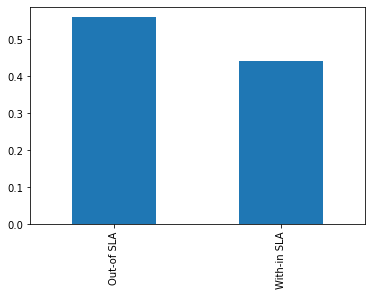

In [5]:
df1['CT_Status'].value_counts(normalize=True).plot.bar()

#### Step_2 : Defining Predictors and Target

In [6]:
exp_clf=setup(df1,target='CT_Status')

,Description,Value
0,session_id,3531
1,Target,CT_Status
2,Target Type,Binary
3,Label Encoded,"Out-of SLA: 0, With-in SLA: 1"
4,Original Data,"(1593, 10)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


#### Step_3 : Compairing diffrent classifiers

In [7]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8323,0.9089,0.7980,0.8160,0.8057,0.6584,0.6599,0.2980
et,Extra Trees Classifier,0.8323,0.9071,0.7959,0.8180,0.8057,0.6583,0.6598,0.3210
xgboost,Extreme Gradient Boosting,0.8135,0.8906,0.7816,0.7924,0.7858,0.6208,0.6223,1.5200
dt,Decision Tree Classifier,0.8081,0.8093,0.7816,0.7834,0.7817,0.6105,0.6115,0.0450
lightgbm,Light Gradient Boosting Machine,0.8036,0.8883,0.7714,0.7790,0.7747,0.6007,0.6013,0.1630
catboost,CatBoost Classifier,0.8036,0.8912,0.7939,0.7702,0.7798,0.6027,0.6056,4.1840
gbc,Gradient Boosting Classifier,0.7945,0.8770,0.7796,0.7627,0.7697,0.5844,0.5862,0.5760
knn,K Neighbors Classifier,0.7920,0.8631,0.7469,0.7751,0.7594,0.5765,0.5783,0.1970
lr,Logistic Regression,0.7812,0.8571,0.7510,0.7524,0.7506,0.5558,0.5570,0.7930
ridge,Ridge Classifier,0.7767,0.0000,0.7429,0.7496,0.7441,0.5462,0.5486,0.0530


#### Step_4 : Createing Models

#### 1. Extra Trees Classifier

In [8]:
etr=rf=create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8125,0.9001,0.7143,0.8333,0.7692,0.6129,0.6181
1,0.7768,0.8788,0.6939,0.7727,0.7312,0.5413,0.5436
2,0.8571,0.9409,0.7959,0.8667,0.8298,0.7071,0.7090
3,0.8839,0.9347,0.9184,0.8333,0.8738,0.7668,0.7699
4,0.8393,0.8813,0.8163,0.8163,0.8163,0.6735,0.6735
5,0.8198,0.9054,0.7755,0.8085,0.7917,0.6331,0.6335
6,0.8198,0.8930,0.8163,0.7843,0.8000,0.6362,0.6366
7,0.8288,0.8785,0.8163,0.8000,0.8081,0.6536,0.6537
8,0.8468,0.9345,0.8367,0.8200,0.8283,0.6901,0.6902
9,0.8378,0.9235,0.7755,0.8444,0.8085,0.6683,0.6701


#### 2. Random Forest Classifier

In [9]:
rf=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8036,0.8902,0.6939,0.8293,0.7556,0.5935,0.6001
1,0.7679,0.8741,0.6735,0.7674,0.7174,0.5218,0.5250
2,0.8304,0.9313,0.8163,0.8000,0.8081,0.6561,0.6562
3,0.8482,0.9321,0.8571,0.8077,0.8317,0.6937,0.6947
4,0.8661,0.8818,0.8776,0.8269,0.8515,0.7297,0.7308
5,0.8108,0.8932,0.7347,0.8182,0.7742,0.6122,0.6148
6,0.8378,0.9096,0.8367,0.8039,0.8200,0.6726,0.6730
7,0.8378,0.8960,0.8163,0.8163,0.8163,0.6712,0.6712
8,0.8739,0.9419,0.8571,0.8571,0.8571,0.7442,0.7442
9,0.8468,0.9384,0.8163,0.8333,0.8247,0.6888,0.6889


#### Hyperparameter Tuning

##### 1. Random Forest Classifier

In [10]:
tune_rf=tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8036,0.8618,0.7143,0.8140,0.7609,0.5954,0.5991
1,0.7857,0.8863,0.6939,0.7907,0.7391,0.5586,0.5621
2,0.7679,0.8523,0.7347,0.7347,0.7347,0.5283,0.5283
3,0.8125,0.8782,0.8163,0.7692,0.7921,0.6216,0.6225
4,0.8304,0.8882,0.8367,0.7885,0.8119,0.6577,0.6586
5,0.7658,0.8581,0.7959,0.7091,0.7500,0.5310,0.5342
6,0.7477,0.8548,0.8571,0.6667,0.7500,0.5034,0.5196
7,0.7658,0.8693,0.7551,0.7255,0.7400,0.5270,0.5274
8,0.8108,0.8938,0.7959,0.7800,0.7879,0.6172,0.6173
9,0.7838,0.8940,0.7755,0.7451,0.7600,0.5634,0.5638


##### 2. Extra Tress Classifier

In [11]:
tune_etr=tune_model(etr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8036,0.8622,0.7143,0.8140,0.7609,0.5954,0.5991
1,0.7857,0.8869,0.6939,0.7907,0.7391,0.5586,0.5621
2,0.7679,0.8526,0.7347,0.7347,0.7347,0.5283,0.5283
3,0.8125,0.8792,0.8163,0.7692,0.7921,0.6216,0.6225
4,0.8304,0.8879,0.8367,0.7885,0.8119,0.6577,0.6586
5,0.7658,0.8586,0.7959,0.7091,0.7500,0.5310,0.5342
6,0.7658,0.8566,0.8776,0.6825,0.7679,0.5388,0.5563
7,0.7658,0.8697,0.7551,0.7255,0.7400,0.5270,0.5274
8,0.8198,0.8932,0.8163,0.7843,0.8000,0.6362,0.6366
9,0.7838,0.8934,0.7755,0.7451,0.7600,0.5634,0.5638


After performing hyperparameter tuning, Random Forest is performimg better. 

#### Tuned Paramters

In [12]:
plot_model(tune_rf,'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,{}
criterion,entropy
max_depth,11
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.005
min_impurity_split,None


#### Results Evaluation---ROC Curve

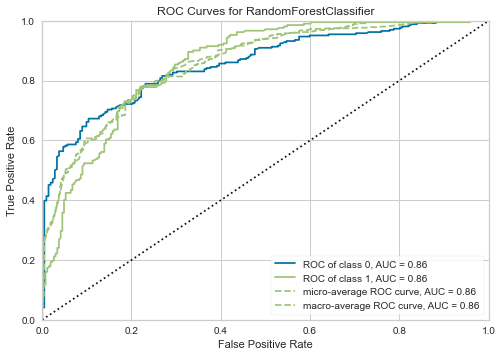

In [13]:
plot_model(tune_rf)

#### Confusion Matrix

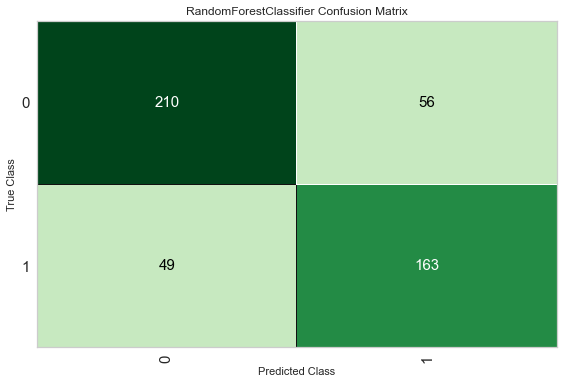

In [14]:
plot_model(tune_rf,'confusion_matrix')

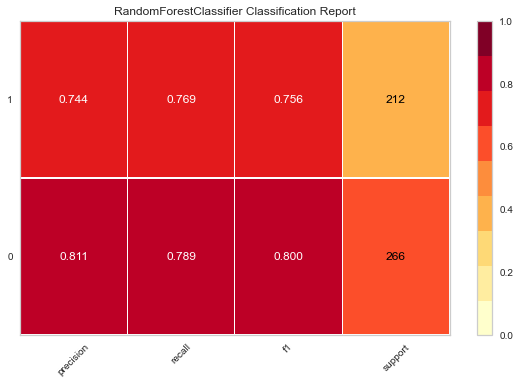

In [15]:
plot_model(tune_rf,'class_report')

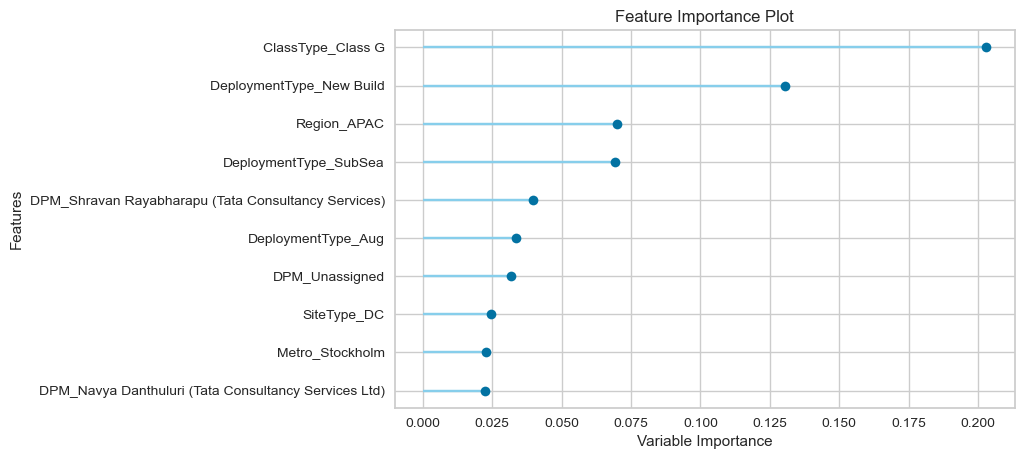

In [16]:
plot_model(tune_rf,'feature')

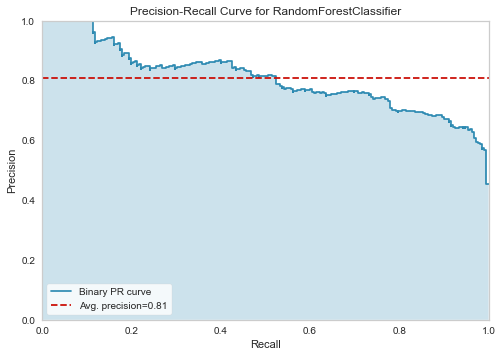

In [17]:
plot_model(tune_rf,'pr')

#### Testing the model

In [18]:
predictions = predict_model(tune_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7803,0.8562,0.7689,0.7443,0.7564,0.5565,0.5567
